In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [485]:
# Parametersfor the benchmarking
fps=295
num_particles=1000
dt=1/fps
spatial_resolution=30E-06  # in microns per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=10000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px
up=1667
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution

0.0006926383579377664


Generating initial x coordinates

In [486]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_v)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_trunc)
sample_x_trunc= sample_x_in_resol.astype(int)
# print(sample_x_trunc)
sample_x_trunc_SI=sample_x_trunc*spatial_resolution
print(sample_x_trunc_SI)
# print(sample_x_SI)

[3.405e-02 1.161e-02 7.380e-03 4.815e-02 1.131e-02 1.773e-02 2.553e-02
 4.086e-02 2.574e-02 3.420e-03 7.020e-03 2.790e-02 4.710e-02 3.762e-02
 3.870e-03 7.560e-03 3.750e-03 1.137e-02 3.801e-02 5.193e-02 7.770e-03
 5.073e-02 6.600e-04 2.193e-02 4.977e-02 4.650e-02 1.296e-02 4.935e-02
 1.014e-02 4.953e-02 4.611e-02 1.323e-02 1.410e-03 2.961e-02 4.830e-02
 6.450e-03 4.683e-02 1.125e-02 3.642e-02 1.917e-02 2.676e-02 1.416e-02
 3.801e-02 1.263e-02 3.522e-02 2.820e-03 1.614e-02 3.219e-02 3.000e-05
 2.550e-03 5.103e-02 7.350e-03 3.315e-02 4.047e-02 5.430e-03 2.184e-02
 2.259e-02 5.172e-02 6.030e-03 5.094e-02 6.420e-03 4.710e-03 1.635e-02
 1.680e-02 2.532e-02 2.571e-02 3.759e-02 9.030e-03 4.344e-02 3.552e-02
 3.501e-02 3.603e-02 3.297e-02 1.653e-02 3.873e-02 3.003e-02 1.137e-02
 3.570e-03 8.460e-03 4.731e-02 8.400e-04 3.606e-02 3.387e-02 3.000e-04
 2.628e-02 2.034e-02 2.514e-02 3.222e-02 3.423e-02 6.060e-03 1.947e-02
 3.381e-02 1.230e-02 3.135e-02 8.520e-03 1.110e-02 4.092e-02 5.181e-02
 1.581

In [487]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
part_no

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Generating velocities

Text(0, 0.5, 'measurements')

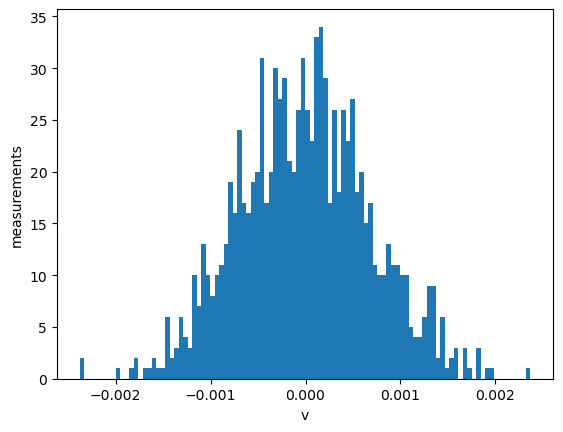

In [488]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Text(0, 0.5, 'measurements')

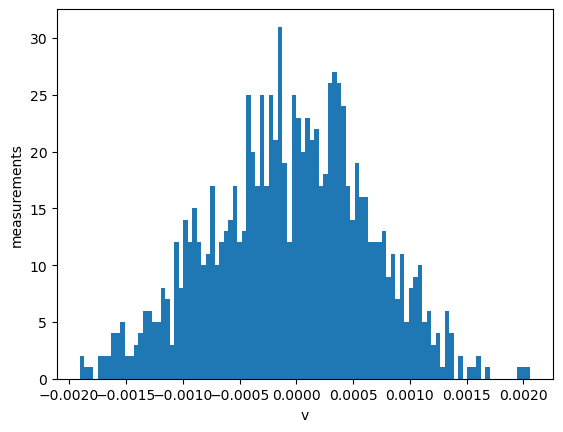

In [489]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

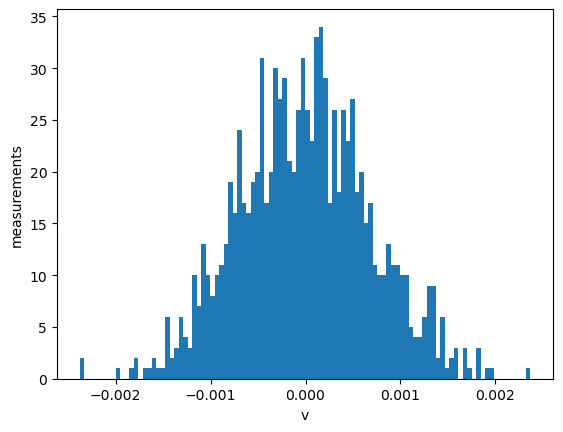

In [490]:
# Simulating the motion of the particles
x_forward=sample_x+sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
x_forward_trunc=x_forward_in_resol.astype(int)
# print(x_forward_trunc)
x_forward_SI=x_forward_trunc*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

In [491]:
# Calculating restored velocities
v_restored=(x_forward_SI-sample_x)/dt
# print(v_restored)

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

0.0045551018506077125
38.57670434311249
3857.6704343112488


Code to make the y coordinates

In [492]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_y = sts.uniform(left_SI, right_SI-left_SI)
sample_y=unif_y.rvs(num_particles)
# print(sample_v)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_y_in_resol= sample_y/spatial_resolution
# print(sample_x_trunc)
sample_y_trunc= sample_y_in_resol.astype(int)
# print(sample_x_trunc)
sample_y_trunc_SI=sample_y_trunc*spatial_resolution
# print(sample_y_trunc_SI
    #   )
# print(sample_x_SI)

Text(0, 0.5, 'measurements')

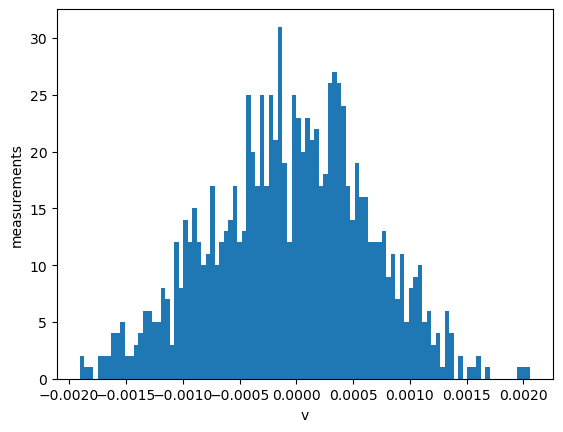

In [493]:
# Simulating the motion of the particles
y_forward=sample_y+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_trunc=y_forward_in_resol.astype(int)
# print(x_forward_trunc)
x_forward_SI=x_forward_trunc*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates

In [494]:
frame = 1
final_frame = 2
frame_data = []

while frame <= final_frame:
    for j in range(num_particles):
        # Append the data for the current frame
        frame_data.append([sample_x_trunc_SI[j], sample_y_trunc_SI[j], j, frame])
        
    # Simulating the motion of the particles for x coordinates
    x_forward = sample_x_trunc_SI + sample_vx * dt
    x_forward_in_resol = x_forward / spatial_resolution
    x_forward_trunc = x_forward_in_resol.astype(int)
    sample_x_trunc_SI = x_forward_trunc * spatial_resolution

    # Simulating the motion of the particles for y coordinates
    y_forward = sample_y_trunc_SI + sample_vy * dt
    y_forward_in_resol = y_forward / spatial_resolution
    y_forward_trunc = y_forward_in_resol.astype(int)
    sample_y_trunc_SI= y_forward_trunc * spatial_resolution

    frame += 1

x_y_df = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no', 'frame'])



In [499]:
print(x_y_df[x_y_df['frame'] ==1])

           x        y  part_no  frame
0    0.03405  0.00267        0      1
1    0.01161  0.02172        1      1
2    0.00738  0.02433        2      1
3    0.04815  0.00582        3      1
4    0.01131  0.03660        4      1
..       ...      ...      ...    ...
995  0.05157  0.00750      995      1
996  0.03792  0.00699      996      1
997  0.04209  0.03480      997      1
998  0.01809  0.01083      998      1
999  0.02736  0.03027      999      1

[1000 rows x 4 columns]


Function to create the database of velocities

In [ ]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
    dt=1/fps
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    
    return right_SI

In [497]:
make_velocities(fps,num_particles,spatial_resolution, mu,T, right)

TypeError: make_velocities() missing 1 required positional argument: 'up_border'

Function to get the discrepancies